# Disaster Tweets Classification
This notebook tackles the Kaggle NLP competition: **Natural Language Processing with Disaster Tweets**.
We classify whether a tweet refers to a real disaster. Our approach includes EDA, preprocessing, TF-IDF vectorization, logistic regression modeling, and F1-based evaluation.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
sns.set(style='whitegrid')

## Load Data

In [37]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## EDA: Class Distribution and Text Characteristics

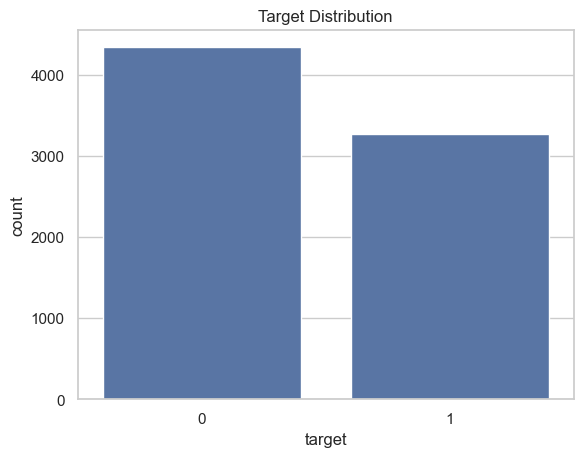

In [40]:
sns.countplot(x='target', data=train_df)
plt.title('Target Distribution')
plt.show()

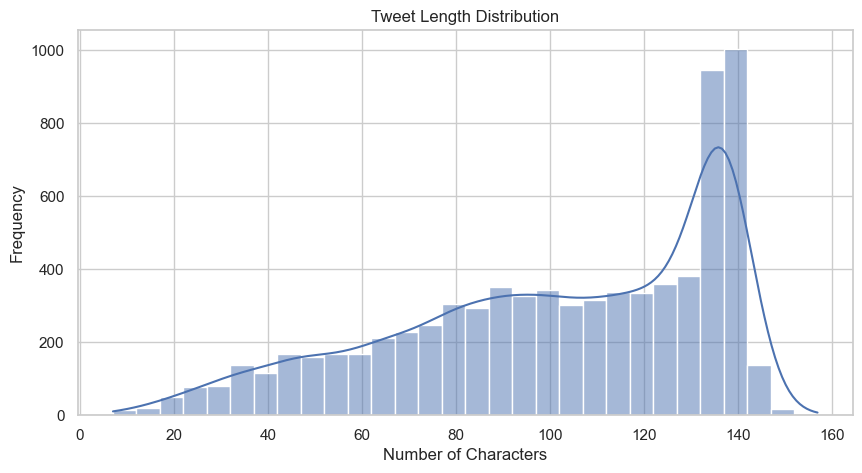

In [42]:
train_df['text_length'] = train_df['text'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(train_df['text_length'], bins=30, kde=True)
plt.title('Tweet Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

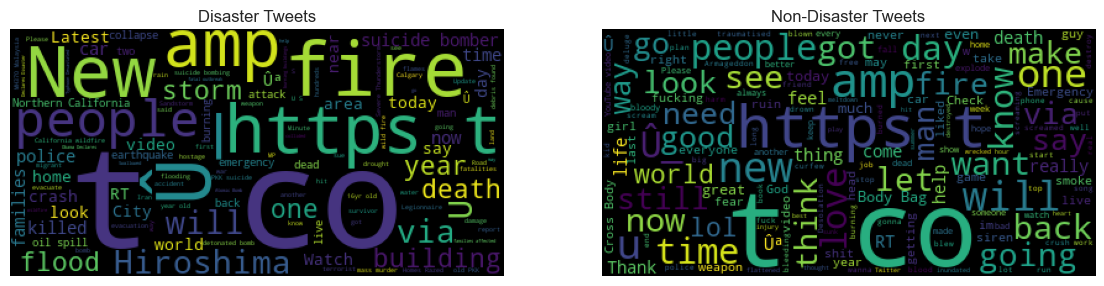

In [44]:
from wordcloud import WordCloud
plt.figure(figsize=(14, 6))
disaster = ' '.join(train_df[train_df['target'] == 1]['text'])
nondisaster = ' '.join(train_df[train_df['target'] == 0]['text'])
plt.subplot(1, 2, 1)
plt.imshow(WordCloud().generate(disaster))
plt.axis('off')
plt.title('Disaster Tweets')
plt.subplot(1, 2, 2)
plt.imshow(WordCloud().generate(nondisaster))
plt.axis('off')
plt.title('Non-Disaster Tweets')
plt.show()

## Text Cleaning

In [46]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text
train_df['clean_text'] = train_df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)

## Vectorization with TF-IDF

In [50]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X = vectorizer.fit_transform(train_df['clean_text'])
X_test = vectorizer.transform(test_df['clean_text'])
y = train_df['target']

## Train Logistic Regression Model

In [53]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print('F1 Score:', f1_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       871
           1       0.86      0.67      0.76       652

    accuracy                           0.81      1523
   macro avg       0.82      0.80      0.80      1523
weighted avg       0.82      0.81      0.81      1523

F1 Score: 0.7553648068669528


## F1 Score Interpretation

Our logistic regression model achieved an F1 score of 0.755 on the validation set. This indicates that the model has a good trade-off between precision (avoiding false positives) and recall (capturing true disaster tweets).

A score of 0.755 suggests that:

The model correctly identifies disaster-related tweets most of the time.

It maintains a healthy balance between being conservative (precision) and comprehensive (recall).

It performs reliably, but there is room for improvement by exploring more advanced models.

## Predict and Generate Submission

In [59]:
test_pred = model.predict(X_test)
submission = pd.DataFrame({'id': test_df['id'], 'target': test_pred})
submission.to_csv('submission.csv', index=False)

## Conclusion
We trained a logistic regression model with TF-IDF features to classify tweets. The F1 score provides a balanced measure of precision and recall. 
This baseline can be enhanced using advanced models such as LSTM, BERT, or by fine-tuning preprocessing and feature engineering.